# Deploying LLM Applications with LangServe
## Content
1. The Challenges in Building LLM-Based Applications
2. What You Need to Know About Deploying LLMs into Production
3. Deploying an LLM Application Using LangServe
4. Monitoring an LLM Application Using LangServe

Tìm hiểu cách triển khai các ứng dụng LLM bằng LangServe. Hướng dẫn toàn diện này bao gồm cài đặt, tích hợp và các biện pháp thực hành tốt nhất để triển khai hiệu quả.

# 1. The Challenges in Building LLM-Based Applications

- lựa chọn và tùy chỉnh mô hình: phụ thuộc vào nhu cầu cụ thể của dự án
- quản lý tài nguyên: yêu cầu các tính toán chuyên sâu
- độ trễ thời gian: độ trễ thấp đối với người dùng liền mạch, cần tối ưu hóa các chiến lược để phục vụ hiệu quả
- giám sát hệ thống: đảm bảo hệ thống hoạt động liền mạch, phát hiện và xử lý lỗi kịp thời
- tích hợp và khả năng tương thích: 
- chí phí thanh toán:

# 2. What You Need to Know About Deploying LLMs into Production

- phức tạp và liên quan đến nhiều thành phần với cơ sở hạ tầng gắn kết và vai trò quan trọng khác nhau
- Giải phẫu của một ứng dụng LLM: một biểu đồ thể hiện sự tương tác giữa các thành phần của một hệ thống là quan trọng giúp chúng ta kiểm soát được các vai trò của các bên (sơ đồ phương pháp tổng quan, sơ đồ hệ thống tổng quan).

ví dụ:
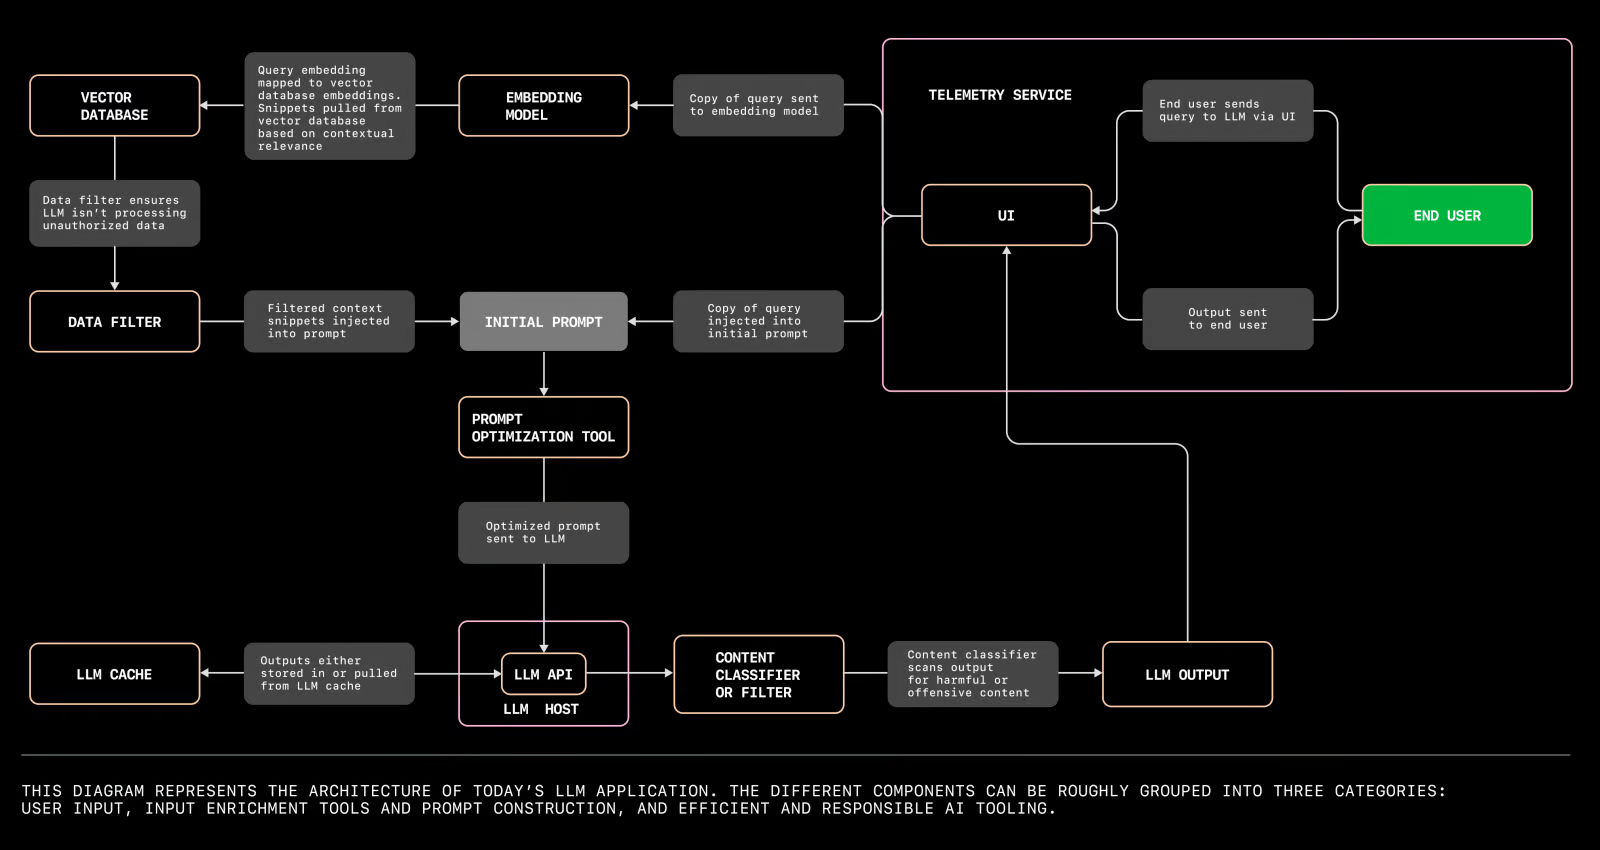

    - Vector databases:
    - Prompt templates:
    - Orchestration and workflow management: quản lý phối hợp và duy trì thành phần
    - Infrastructure and scalability: cơ sở hạ tầng và khả năng mở rộng
    - Monitoring and logging: giám sát và ghi nhật ký (cho mục đích truy vếtvết)
    - Security and compliance: bảo mật và tuân thủ
    - Integration with existing systems: tích hợp với các hệ thống hiện có

- Các cách tiếp cận khác nhau để triển khai LLM vào sản xuất: triển khai trên máy chủ cục bộ hoặc trên một máy chủ bên ngoài
- Top tools for productionizing LLMs:
    - LangServe
    - Kubernetes
    - TensorFlow Serving
    - Amazon SageMaker
    - MLflow

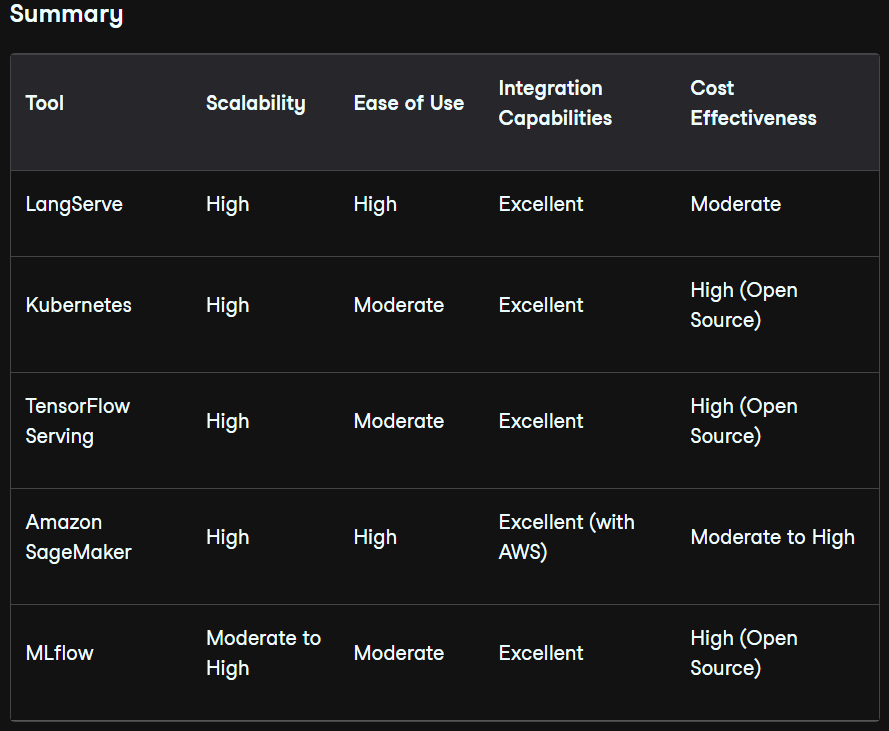

# 3. Deploying an LLM Application Using LangServe

## 3.1. Installation

In [ ]:
%pip install "langserve[all]"

## 3.2. Setup

### 3.2.1 Create a new app

Run in command:

In [ ]:
# langchain app new my-app

### 3.2.2 Add third-party packages with Poetry

LangServe sử dụng Poetry để quản lý phụ thuộc. Nếu bạn không quen với Poetry, hãy tham khảo tài liệu Poetry để biết thêm thông tin. Để thêm các gói có liên quan, hãy sử dụng:

In [ ]:
# poetry add [package-name] // e.g `poetry add langchain-openai`
# poetry add langchain-openai langchain langchain community

### 3.2.3 Set up environment variables

In [ ]:
OPENAI_API_KEY="sk-..."

## 3.3. Server

Điều hướng đến tệp ```server.py```. Tệp này sẽ chứa logic chính cho ứng dụng LangServe của chúng ta. Sau đây là ví dụ về ứng dụng LangServe đơn giản bao gồm tuyến đường để tóm tắt văn bản bằng mô hình ngôn ngữ của OpenAI:

In [ ]:
from fastapi import FastAPI
from fastapi.responses import RedirectResponse
from langserve import add_routes
from langchain.prompts import ChatPromptTemplate
from langchain.chat_models import ChatOpenAI


app = FastAPI(
    title="LangChain Server",
    version="1.0",
    description="A simple API server using Langchain's Runnable interfaces",
)


@app.get("/")
async def redirect_root_to_docs():
    return RedirectResponse("/docs")


# Edit this to add the chain you want to add:
# Define a route for the OpenAI chat model
add_routes(
    app, 
    ChatOpenAI(),
    path="./openai"
    # NotImplemented
)

# Define a route with a custom prompt
summarize_prompt = ChatPromptTemplate.from_template("Summarize the following text: {text}")
add_routes(
    app,
    summarize_prompt | ChatOpenAI(),
    path="./summarize"
)

if __name__ == "__main__":
    import uvicorn
    uvicorn.run(app, host="0.0.0.0", port=8000)


## 3.4. Run the Server

## 3.5. Serve your application

# 4. Monitoring an LLM Application Using LangServe

Đảm bảo độ tin cậy, hiệu suất và độ chính xác của ứng dụng Mô hình ngôn ngữ lớn (LLM) trong quá trình sản xuất là rất quan trọng. Mặc dù LangServe thiếu các tính năng giám sát tích hợp, nhưng nó tích hợp liền mạch với các công cụ được sử dụng rộng rãi để theo dõi và phân tích tình trạng ứng dụng. Phần này cung cấp hướng dẫn kỹ thuật về cách sử dụng LangServe kết hợp với các công cụ này để duy trì và giám sát ứng dụng LLM.

## 4.1. Setting up logging

Ghi nhật ký là bước đầu tiên trong việc giám sát ứng dụng LLM của bạn. Nó giúp theo dõi hành vi của ứng dụng và xác định bất kỳ bất thường nào. Sau đây là cách bạn có thể thiết lập ghi nhật ký trong ứng dụng FastAPI của mình với LangServe:

In [ ]:
import logging


# config logging
logging.basicConfig(level=logging.INFO)
logger = logging.getLogger("langchain_serve")

app = FastAPI()

# Example of loging with route
@app.get("/status")
async def status():
    logger.info("Status endpoint was cancelled")
    return {"status": "Running"}

Với thiết lập này, mọi cuộc gọi đến điểm cuối /status sẽ ghi lại thông báo cho biết điểm cuối đã được truy cập. Điều này có thể được mở rộng để ghi lại các sự kiện và lỗi quan trọng khác.

## 4.2. Integrating Prometheus for metrics

Prometheus là một công cụ phổ biến để giám sát và cảnh báo. Nó có thể được tích hợp với FastAPI để thu thập số liệu và cung cấp thông tin chi tiết về hiệu suất của ứng dụng. Sau đây là cách bạn có thể thiết lập Prometheus với LangServe:

### 4.2.1. Install the Prometheus client

In [ ]:
%pip install prometheus_client

### 4.2.2 Update server.py to include Prometheus middleware

In [ ]:
import time
from prometheus_client import start_http_server
from prometheus_client import Summary
from fastapi.middleware import Middleware
from fastapi import FastAPI
from fastapi import Request

# Start Prometheus server
start_http_server(8001)

# Define a Prometheus metric
REQUEST_TIME = Summary(
    "request_processing_seconds",
    "Time spent processing request",
)

app = FastAPI()

# Middleware for tracking request processing time
@app.middleware("http")
async def add_prometheus_middleware(request: Request, call_next):
    start_time = time.time()
    response = await call_next(request)
    duration = time.time() - start_time
    REQUEST_TIME.observe(duration)
    return response

Thiết lập này sẽ khởi động máy chủ Prometheus trên cổng 8001 và theo dõi thời gian xử lý từng yêu cầu.

## 4.3. Setting up alerts with Prometheus and Grafana

Prometheus có thể được cấu hình để kích hoạt cảnh báo dựa trên các điều kiện nhất định và Grafana có thể được sử dụng để trực quan hóa các số liệu này. Sau đây là phác thảo ngắn gọn về cách thiết lập cảnh báo:

### 4.3.1 Configure Prometheus alert rules

In [ ]:
# Create a file called alert.rules:
# groups:
# - name: example
#   rules:
#   - alert: HighRequestLatency
# 	expr: request_processing_seconds_bucket{le="0.5"} > 0.5
# 	for: 5m
# 	labels:
#   	severity: page
# 	annotations:
#   	summary: High request latency
#   	description: "Request latency is above 0.5 seconds for more than 5 minutes."

### 4.3.2 Configure Prometheus to use the alert rules

In [ ]:
# Update your Prometheus configuration (prometheus.yml):
# rule_files:
#   - "alert.rules"

### 4.3.2 Setup Grafana for visualization

Để cài đặt và cấu hình Grafana, hãy tham khảo tài liệu cài đặt và cấu hình. Sau khi thiết lập, bạn có thể tiến hành tạo bảng thông tin và bảng điều khiển để trực quan hóa các số liệu như độ trễ yêu cầu, tỷ lệ lỗi, v.v.

    - https://grafana.com/docs/grafana/latest/setup-grafana/installation/
    - https://grafana.com/docs/grafana/latest/setup-grafana/configure-grafana/

## 4.4. Implementing health checks

Kiểm tra sức khỏe là điều cần thiết để theo dõi tình trạng sức khỏe của ứng dụng và đảm bảo ứng dụng chạy như mong đợi. Sau đây là cách chúng ta có thể thực hiện một điểm cuối kiểm tra sức khỏe đơn giản:

In [ ]:
@app.get("/health")
async def health():
    return {"status": "Healthy"}

## 4.5. Monitoring errors and exceptions

Việc ghi lại và giám sát lỗi và ngoại lệ là rất quan trọng để xác định các vấn đề trong ứng dụng. Sau đây là cách bạn có thể mở rộng việc ghi nhật ký để ghi lại ngoại lệ:

In [ ]:
from fastapi import Request
from fastapi import HTTPException
from fastapi.responses import JSONResponse

@app.exception_handler(HTTPException)
async def global_exception_handler(request: Request, exc: Exception):
    logger.error(f"An error occurredL {exc}")
    return JSONResponse(
        status_code=500,
        content={"message": "Internal server error"},
    )

@app.exception_handler(HTTPException)
async def http_exception_handler(request: Request, exc: HTTPException):
    logger.error(f"HTTP error occurred: {exc.detail}")
    return JSONResponse(
        status_code=exc.status_code,
        content={"message": exc.detail},
    )

# 5. Closing Thoughts

Triển khai các mô hình ngôn ngữ lớn (LLM) vào sản xuất có thể chuyển đổi các ứng dụng của bạn, nhưng quá trình này liên quan đến việc điều hướng các phức tạp như lựa chọn mô hình, quản lý tài nguyên và tích hợp. LangServe đơn giản hóa những thách thức này, cho phép các nhà phát triển triển khai, giám sát và duy trì các ứng dụng LLM một cách hiệu quả. Bằng cách sử dụng LangServe, bạn có thể hợp lý hóa việc triển khai, đảm bảo hiệu suất mạnh mẽ và đạt được sự tích hợp liền mạch với các hệ thống của mình. Để tìm hiểu sâu hơn về việc xây dựng và triển khai các ứng dụng LLM, hãy cân nhắc khám phá khóa học Phát triển ứng dụng LLM với LangChain trên DataCamp. Tài nguyên này bao gồm các chủ đề thiết yếu bao gồm tạo chatbot, tích hợp dữ liệu bên ngoài bằng Ngôn ngữ biểu thức LangChain (LCEL) và nhiều chủ đề khác.